<a href="https://colab.research.google.com/github/kothariyash321/airbnb-host-coach/blob/main/Airbnb_687.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data engineering
Missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Airbnb Host ID                    120217 non-null  int64  
 1   Airbnb Property ID                120217 non-null  int64  
 2   City_x                            120217 non-null  object 
 3   superhost_period_all              120217 non-null  int64  
 4   Scraped Date                      120217 non-null  object 
 5   host_is_superhost_in_period       120217 non-null  int64  
 6   prev_host_is_superhost_in_period  120217 non-null  int64  
 7   rating_ave_pastYear               100372 non-null  float64
 8   numReviews_pastYear               101419 non-null  float64
 9   numCancel_pastYear                101419 non-null  float64
 10  num_5_star_Rev_pastYear           101419 non-null  float64
 11  prop_5_StarReviews_pastYear       100372 non-null  f

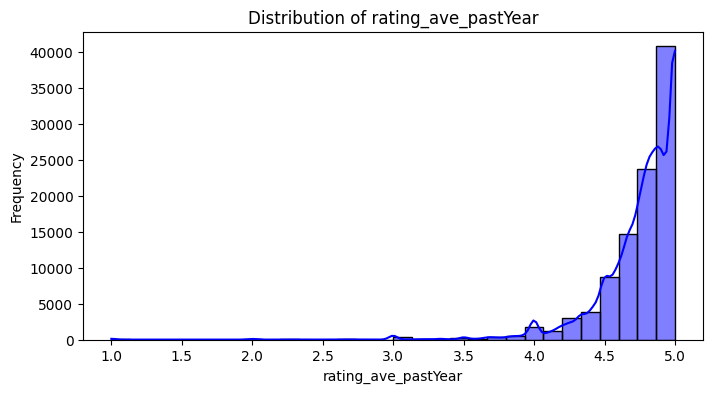

Imputing rating_ave_pastYear using MEDIAN: 4.818181818

Column: numReviews_pastYear
Missing Values: 18582
Skewness: 6.04


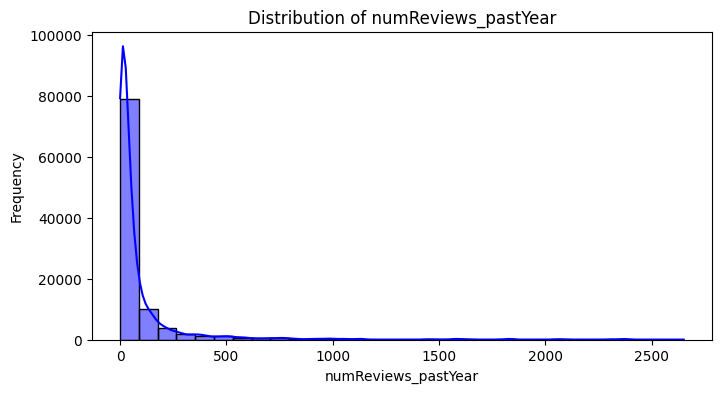

Imputing numReviews_pastYear using MEDIAN: 28.0

Column: numCancel_pastYear
Missing Values: 18582
Skewness: 10.02


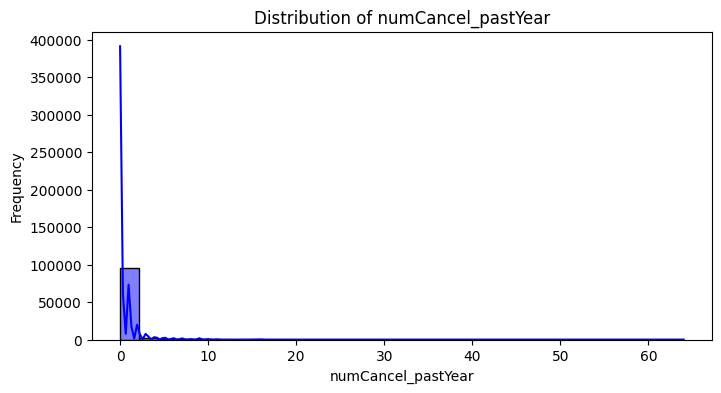

Imputing numCancel_pastYear using MEDIAN: 0.0

Column: num_5_star_Rev_pastYear
Missing Values: 18582
Skewness: 6.05


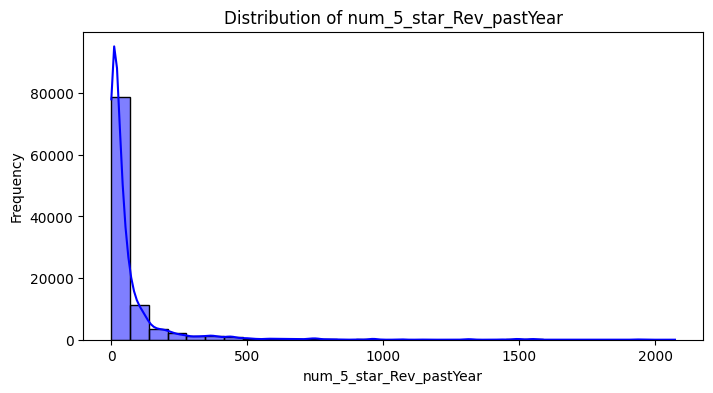

Imputing num_5_star_Rev_pastYear using MEDIAN: 23.0

Column: prop_5_StarReviews_pastYear
Missing Values: 19620
Skewness: -1.64


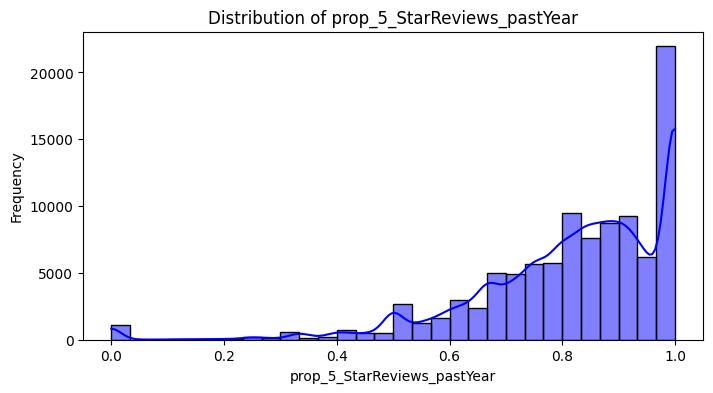

Imputing prop_5_StarReviews_pastYear using MEDIAN: 0.851851852

Column: numReservedDays_pastYear
Missing Values: 3486
Skewness: 8.13


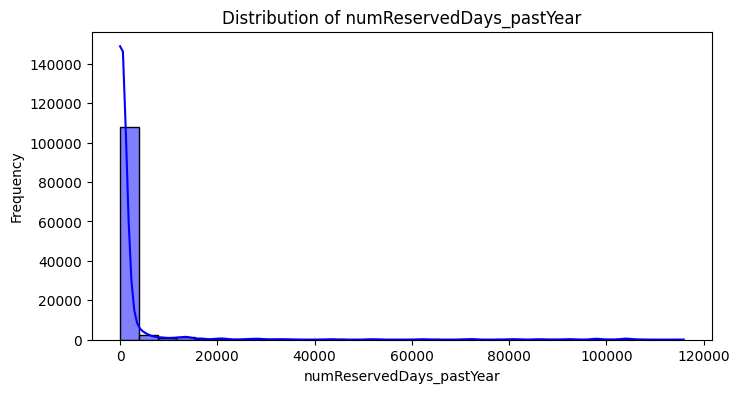

Imputing numReservedDays_pastYear using MEDIAN: 188.0

Column: numReserv_pastYear
Missing Values: 3486
Skewness: 7.88


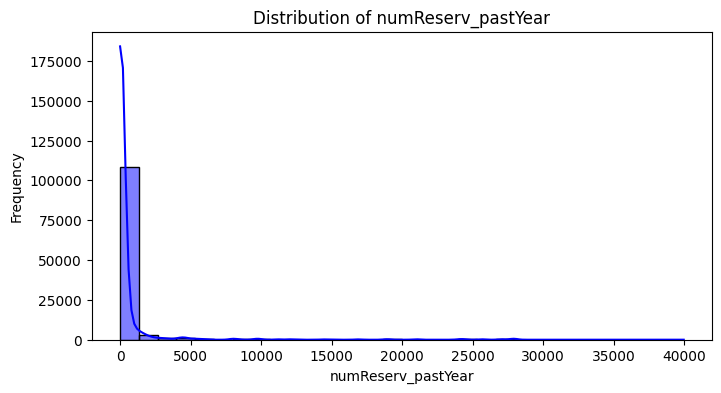

Imputing numReserv_pastYear using MEDIAN: 50.0

Column: available_days
Missing Values: 14878
Skewness: -0.68


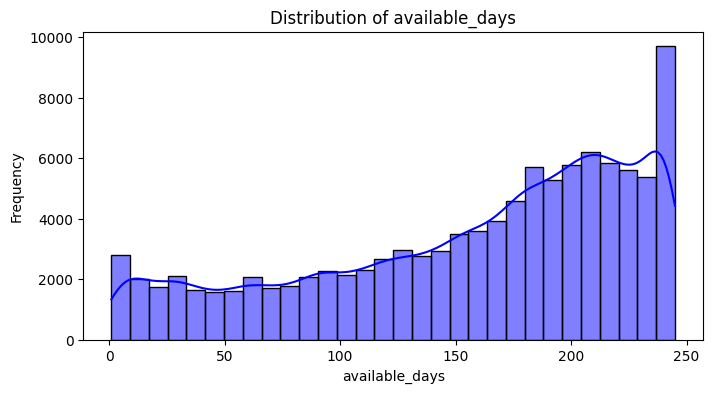

Imputing available_days using MEAN: 156.36468860672022

Column: available_days_aveListedPrice
Missing Values: 14878
Skewness: 16.88


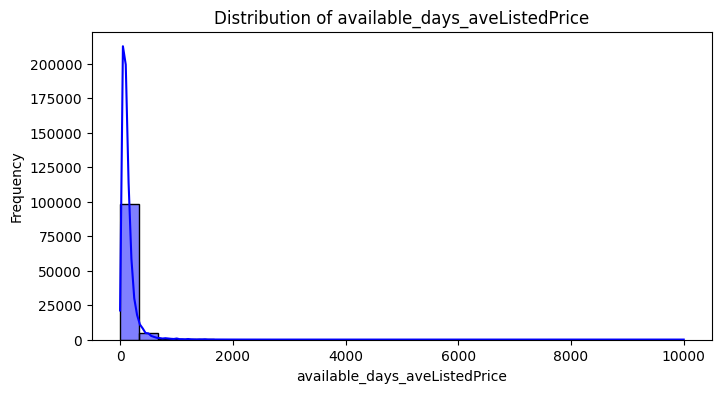

Imputing available_days_aveListedPrice using MEDIAN: 100.0

Column: booked_days
Missing Values: 37650
Skewness: 1.13


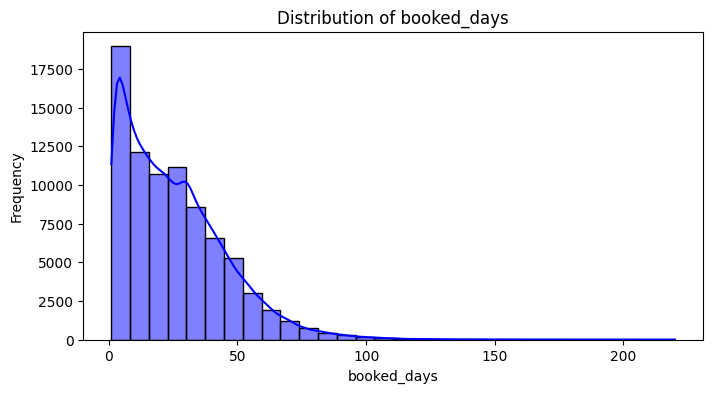

Imputing booked_days using MEDIAN: 22.0

Column: booked_days_avePrice
Missing Values: 37650
Skewness: 4.67


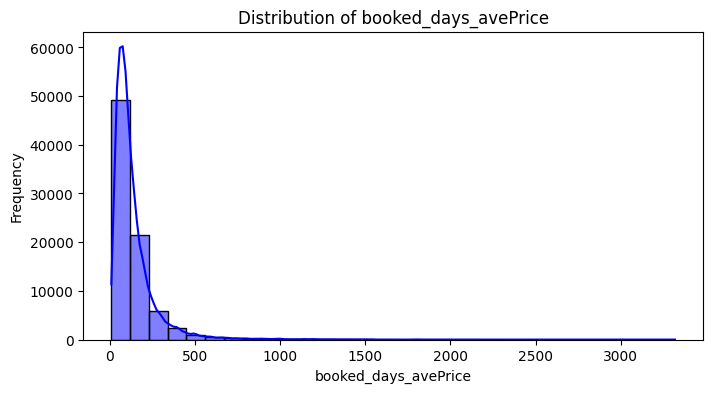

Imputing booked_days_avePrice using MEDIAN: 99.58333333

Column: Bedrooms
Missing Values: 11
Skewness: 1.92


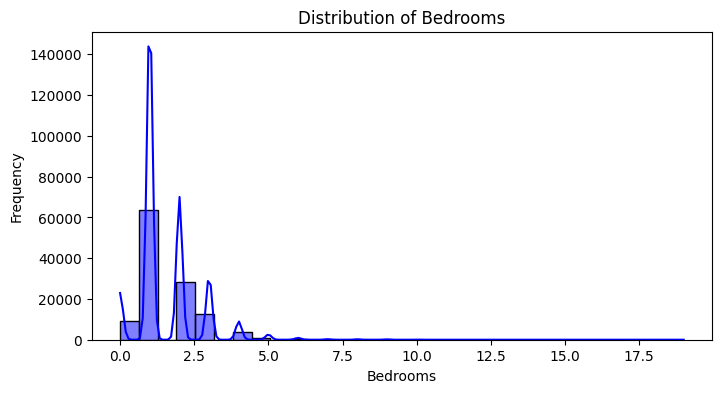

Imputing Bedrooms using MEDIAN: 1.0

Column: Bathrooms
Missing Values: 47
Skewness: 6.02


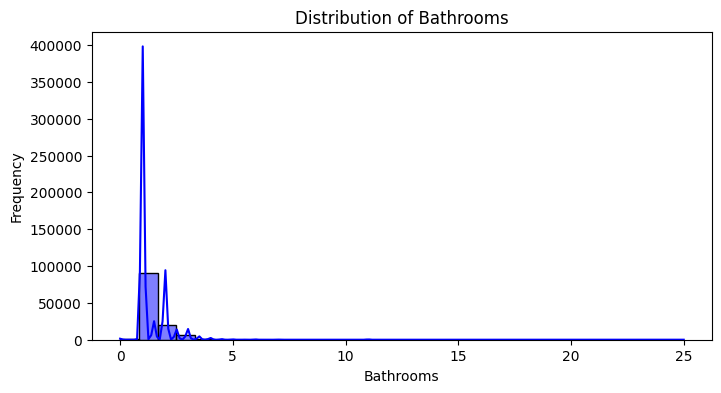

Imputing Bathrooms using MEDIAN: 1.0

Column: Max Guests
Missing Values: 8
Skewness: 1.79


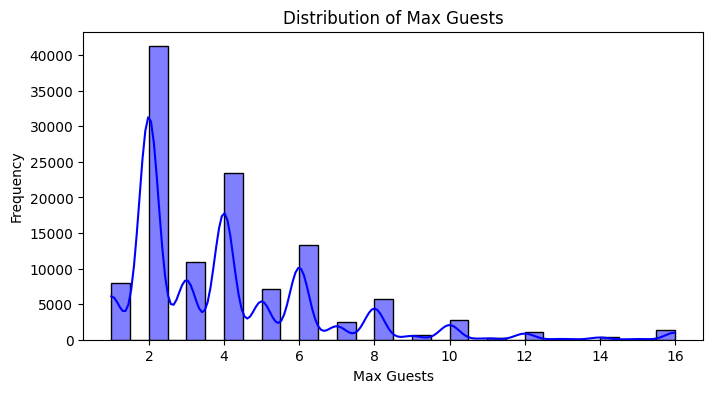

Imputing Max Guests using MEDIAN: 3.0

Column: Cleaning Fee (USD)
Missing Values: 23963
Skewness: 2.08


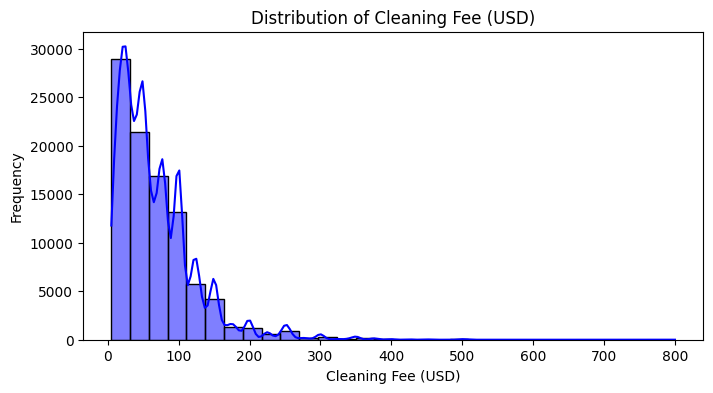

Imputing Cleaning Fee (USD) using MEDIAN: 50.0

Column: Minimum Stay
Missing Values: 3
Skewness: 17.38


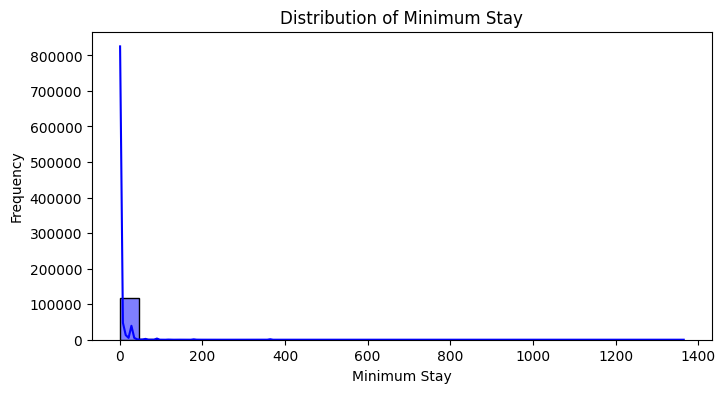

Imputing Minimum Stay using MEDIAN: 2.0

Column: Number of Reviews
Missing Values: 18
Skewness: 3.10


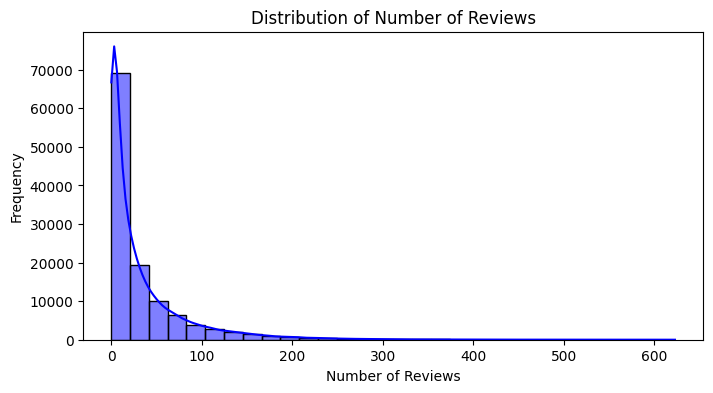

Imputing Number of Reviews using MEDIAN: 14.0

Column: Rating Overall
Missing Values: 14626
Skewness: -5.86


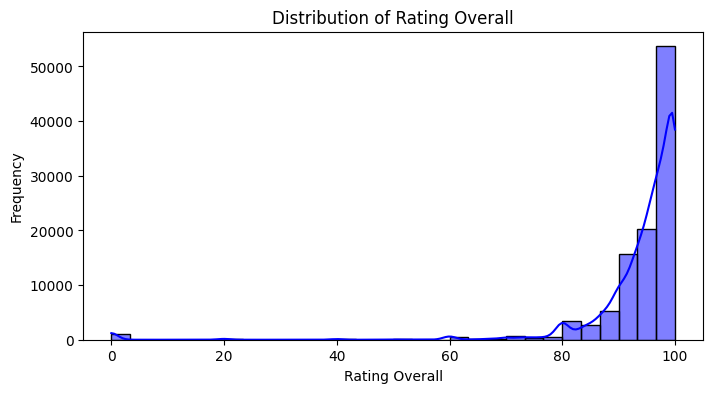

Imputing Rating Overall using MEDIAN: 97.0

Column: revenue
Missing Values: 37650
Skewness: 6.49


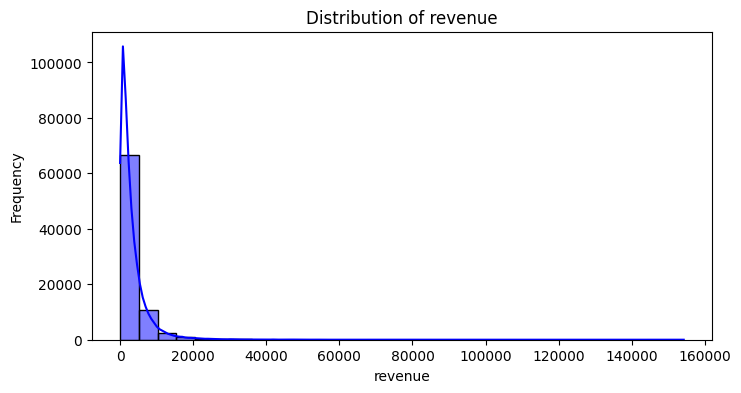

Imputing revenue using MEDIAN: 1975.0

Column: occupancy_rate
Missing Values: 37650
Skewness: 2.00


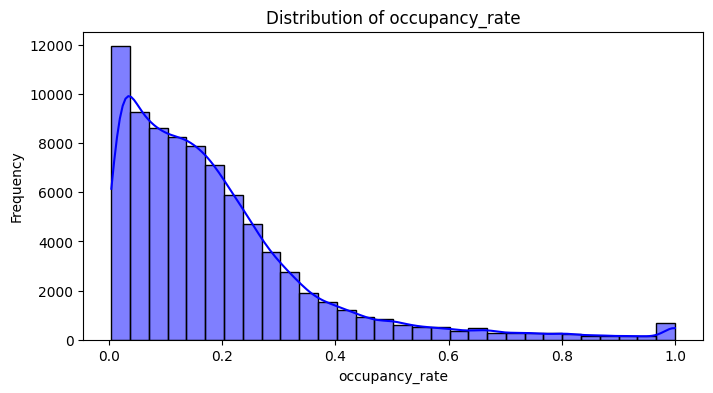

Imputing occupancy_rate using MEDIAN: 0.147540984

Column: Property Type
Missing Values: 1
Mode: Apartment with Frequency: 0.59
Imputing Property Type using MODE: Apartment

Missing Values After Imputation:
Airbnb Host ID                      0
Airbnb Property ID                  0
City_x                              0
superhost_period_all                0
Scraped Date                        0
host_is_superhost_in_period         0
prev_host_is_superhost_in_period    0
rating_ave_pastYear                 0
numReviews_pastYear                 0
numCancel_pastYear                  0
num_5_star_Rev_pastYear             0
prop_5_StarReviews_pastYear         0
numReservedDays_pastYear            0
numReserv_pastYear                  0
available_days                      0
available_days_aveListedPrice       0
booked_days                         0
booked_days_avePrice                0
Property Type                       0
Listing Type                        0
Bedrooms                         

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import zscore

#remove warnings
import warnings
warnings.filterwarnings('ignore')
## Step 2: Mount Google Drive (only if file is stored in Drive)
##from google.colab import drive
##drive.mount('/content/drive')

# Step 3: Load the Airbnb Dataset
file_path = 'AirbnbChicago.csv'  # Update this to the actual file path
airbnb_data = pd.read_csv(file_path)

# Step 4: Select Relevant Columns (based on Airbnb dataset description doc)
selected_columns = [
    'Airbnb Host ID', 'Airbnb Property ID', 'City_x', 'superhost_period_all',
    'Scraped Date', 'host_is_superhost_in_period', 'prev_host_is_superhost_in_period',
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
    'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear',
    'numReserv_pastYear', 'available_days', 'available_days_aveListedPrice',
    'booked_days', 'booked_days_avePrice', 'Property Type', 'Listing Type',
    'Bedrooms', 'Bathrooms', 'Neighborhood', 'Max Guests', 'Cleaning Fee (USD)',
    'Minimum Stay', 'Nightly Rate', 'Number of Reviews', 'Rating Overall',
    'revenue', 'occupancy_rate', 'census_tract', 'tract_total_pop',
    'tract_superhosts', 'tract_superhosts_ratio', 'tract_booking_share',
    'tract_revenue_share'
]

# Filter only the selected columns
airbnb_data = airbnb_data[selected_columns]
airbnb_data.head()
airbnb_data.info()
airbnb_data.describe()
# Step 5: Handle Missing Data
print("\nMissing Values Before Handling:")
print(airbnb_data.isnull().sum())
# drop missing values from neighbor column since it is critical for prediction
airbnb_data.dropna(subset=['Neighborhood'], inplace=True)

# Step 5: Identify Numerical Columns
numerical_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns

# Step 6: Strategy for Numerical Variables
for col in numerical_columns:
    missing_count = airbnb_data[col].isnull().sum()
    if missing_count > 0:
        skewness = skew(airbnb_data[col].dropna())
        print(f"\nColumn: {col}")
        print(f"Missing Values: {missing_count}")
        print(f"Skewness: {skewness:.2f}")

        # Plot the distribution
        plt.figure(figsize=(8, 4))
        sns.histplot(airbnb_data[col], kde=True, color='blue', bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        # Impute based on skewness
        if abs(skewness) < 1:  # Low skewness means normal-like distribution
            imputation_value = airbnb_data[col].mean()
            print(f"Imputing {col} using MEAN: {imputation_value}")
            airbnb_data[col].fillna(imputation_value, inplace=True)
        else:
            imputation_value = airbnb_data[col].median()
            print(f"Imputing {col} using MEDIAN: {imputation_value}")
            airbnb_data[col].fillna(imputation_value, inplace=True)

# Step 7: Identify Categorical Columns
categorical_columns = airbnb_data.select_dtypes(include=['object']).columns

# Step 8: Strategy for Categorical Variables
for col in categorical_columns:
    missing_count = airbnb_data[col].isnull().sum()
    if missing_count > 0:
        print(f"\nColumn: {col}")
        print(f"Missing Values: {missing_count}")

        # Calculate the mode
        mode_value = airbnb_data[col].mode()[0]  # Extract mode value
        mode_frequency = airbnb_data[col].value_counts(normalize=True).max()

        print(f"Mode: {mode_value} with Frequency: {mode_frequency:.2f}")

        # If mode occurs in more than 50% of the data, use mode, otherwise use 'Unknown'
        if mode_frequency > 0.5:
            print(f"Imputing {col} using MODE: {mode_value}")
            airbnb_data[col].fillna(mode_value, inplace=True)
        else:
            print(f"Imputing {col} using 'Unknown'")
            airbnb_data[col].fillna('Unknown', inplace=True)

# Step 9: Print Missing Values Summary
print("\nMissing Values After Imputation:")
print(airbnb_data.isnull().sum())

# Step 8: Basic Data Type Adjustment
# Convert certain columns to datetime format
airbnb_data['Scraped Date'] = pd.to_datetime(airbnb_data['Scraped Date'],format='%d-%m-%Y', errors='coerce')

# Ensure categorical variables are set to 'category' dtype to optimize memory usage
for col in ['Property Type', 'Listing Type', 'City_x', 'Neighborhood']:
    airbnb_data[col] = airbnb_data[col].astype('category')

# Print a summary of the cleaned and processed dataset
print("\nData Preparation Complete. Here is the summary:")
print("\nData Types:")
print(airbnb_data.info())
print("\nPreview of Data:")
print(airbnb_data.head())



Handling Outliers


Analyzing Outliers in Column: Airbnb Host ID
Number of Outliers (IQR): 6587
Number of Outliers (Z-Score): 1954


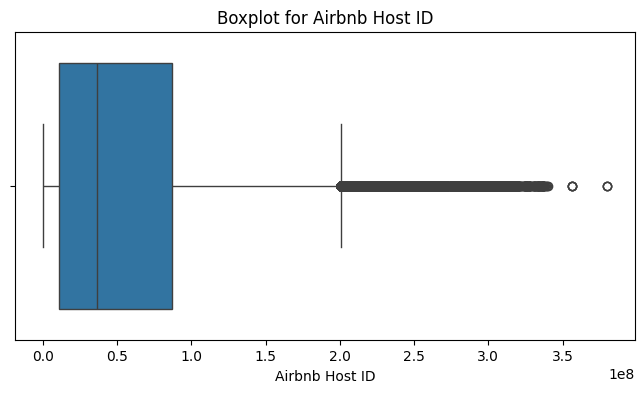


Analyzing Outliers in Column: Airbnb Property ID
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


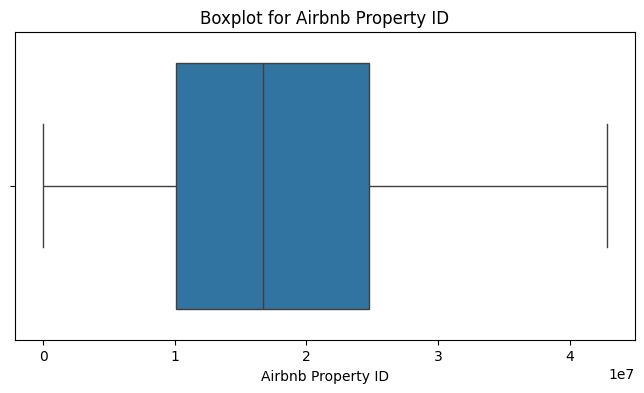


Analyzing Outliers in Column: superhost_period_all
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


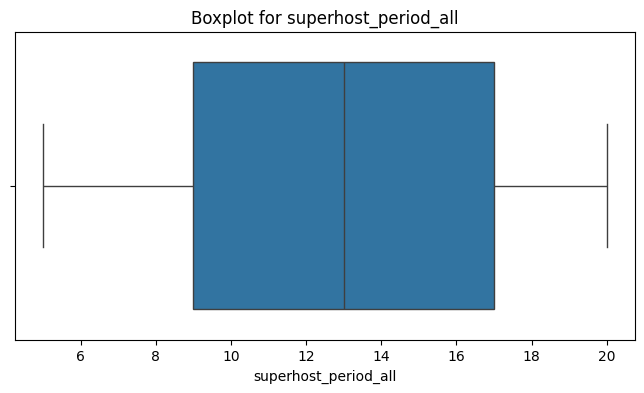


Analyzing Outliers in Column: host_is_superhost_in_period
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


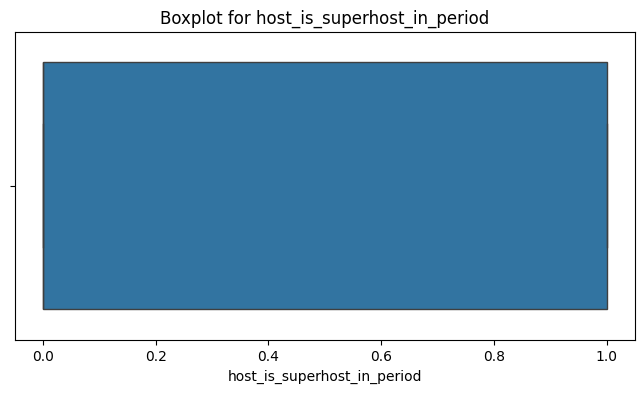


Analyzing Outliers in Column: prev_host_is_superhost_in_period
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


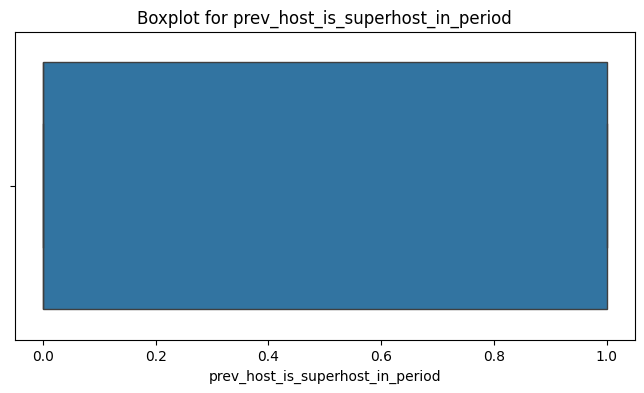


Analyzing Outliers in Column: rating_ave_pastYear
Number of Outliers (IQR): 7990
Number of Outliers (Z-Score): 1692


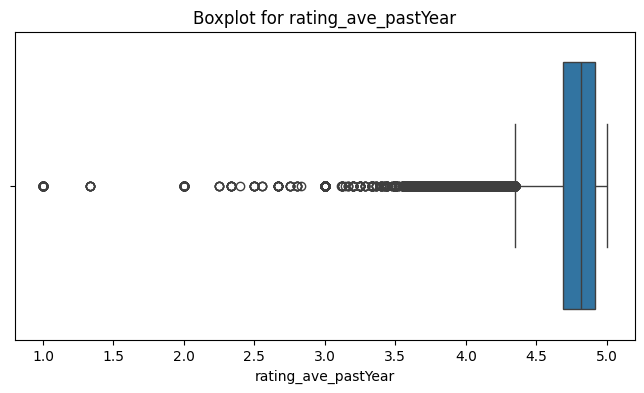


Analyzing Outliers in Column: numReviews_pastYear
Number of Outliers (IQR): 15030
Number of Outliers (Z-Score): 2308


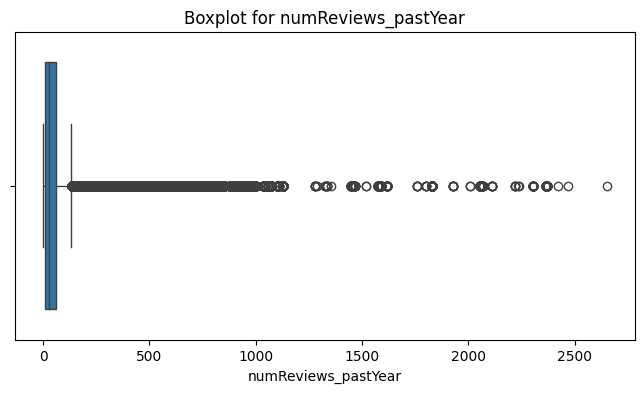


Analyzing Outliers in Column: numCancel_pastYear
Number of Outliers (IQR): 24035
Number of Outliers (Z-Score): 1736


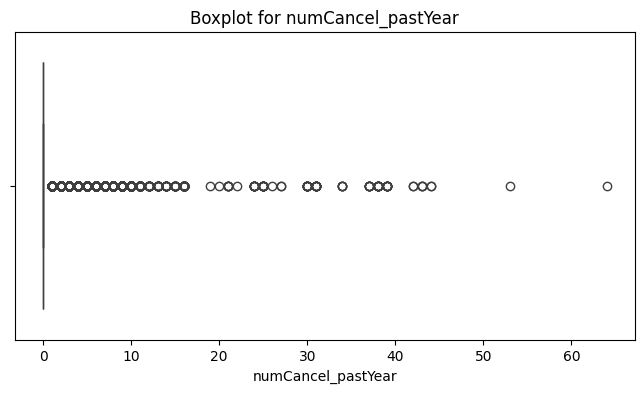


Analyzing Outliers in Column: num_5_star_Rev_pastYear
Number of Outliers (IQR): 14224
Number of Outliers (Z-Score): 2128


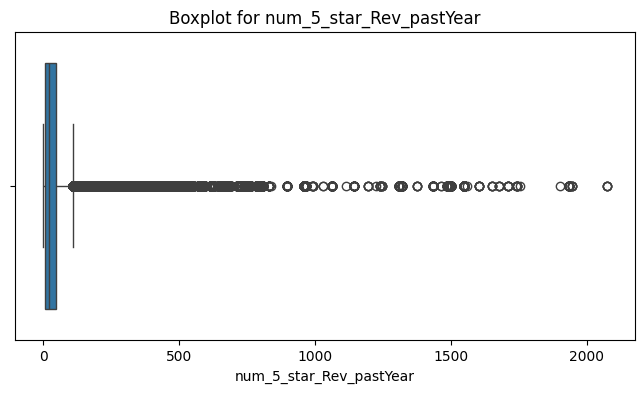


Analyzing Outliers in Column: prop_5_StarReviews_pastYear
Number of Outliers (IQR): 6125
Number of Outliers (Z-Score): 2034


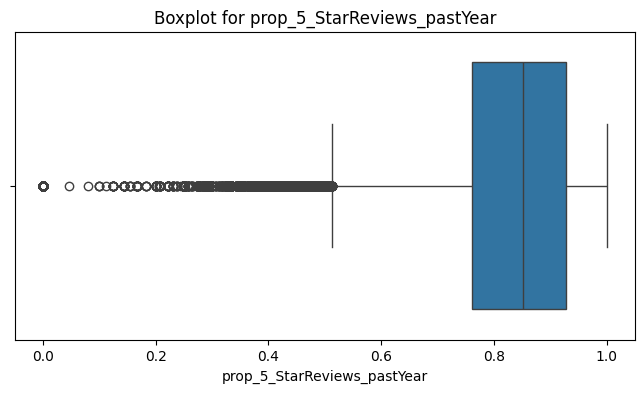


Analyzing Outliers in Column: numReservedDays_pastYear
Number of Outliers (IQR): 17366
Number of Outliers (Z-Score): 1664


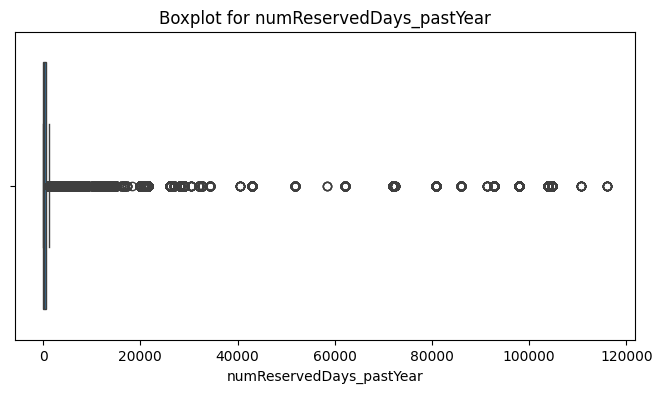


Analyzing Outliers in Column: numReserv_pastYear
Number of Outliers (IQR): 17174
Number of Outliers (Z-Score): 1955


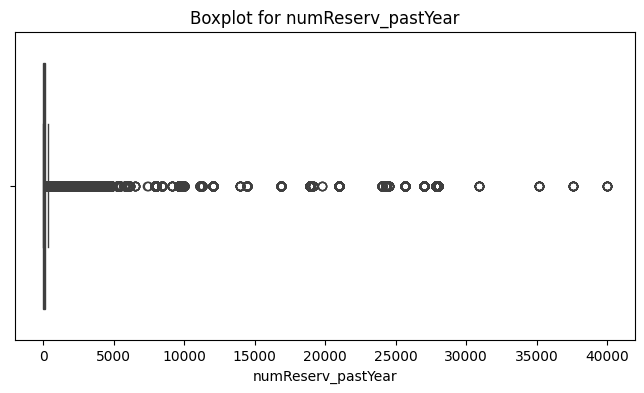


Analyzing Outliers in Column: available_days
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


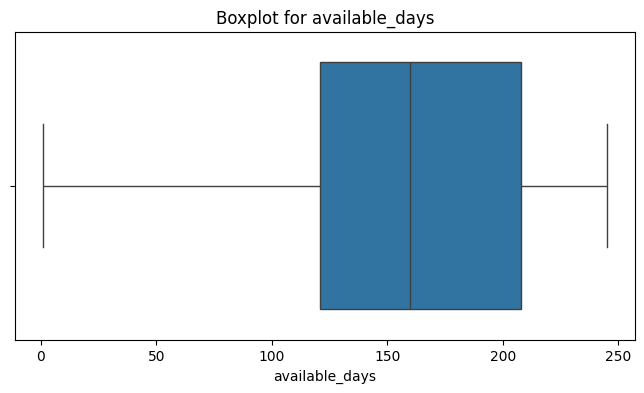


Analyzing Outliers in Column: available_days_aveListedPrice
Number of Outliers (IQR): 9264
Number of Outliers (Z-Score): 1427


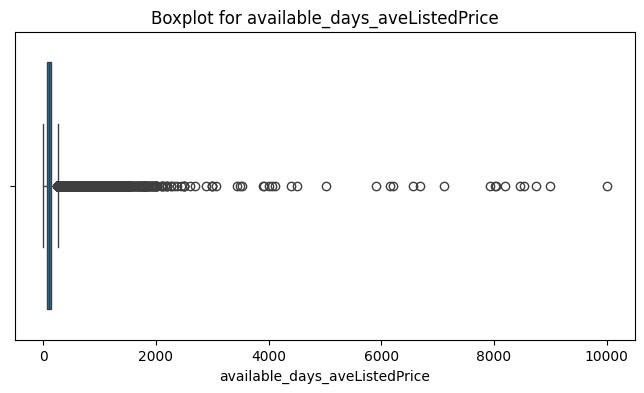


Analyzing Outliers in Column: booked_days
Number of Outliers (IQR): 8043
Number of Outliers (Z-Score): 1880


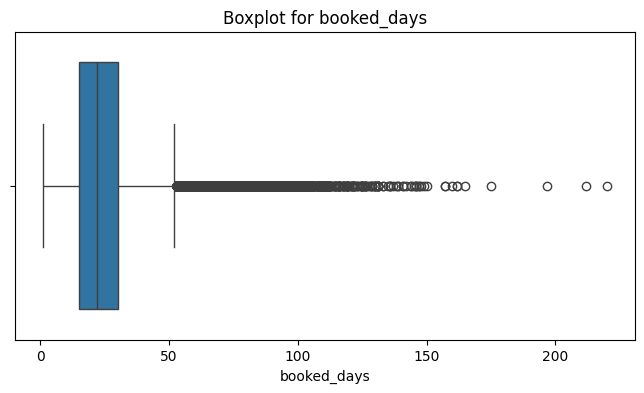


Analyzing Outliers in Column: booked_days_avePrice
Number of Outliers (IQR): 14258
Number of Outliers (Z-Score): 2185


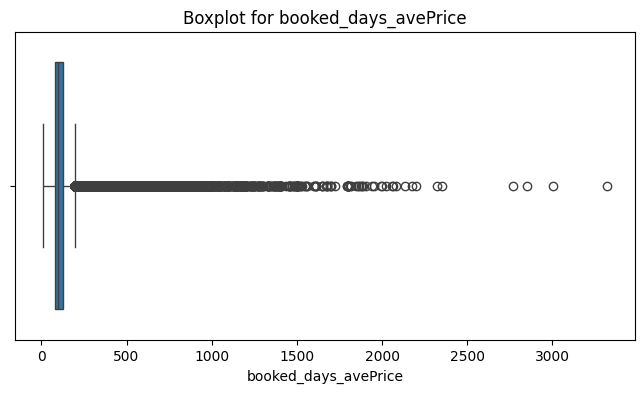


Analyzing Outliers in Column: Bedrooms
Number of Outliers (IQR): 5329
Number of Outliers (Z-Score): 1722


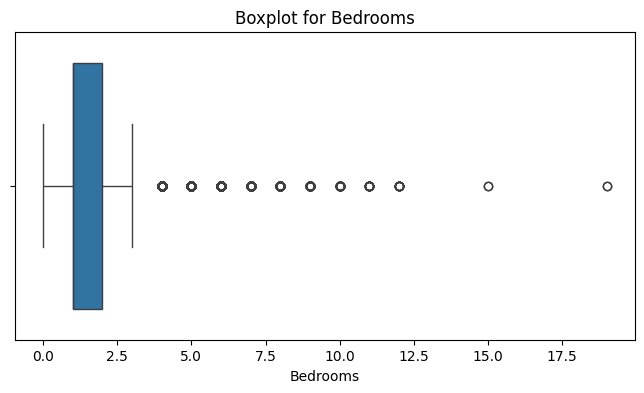


Analyzing Outliers in Column: Bathrooms
Number of Outliers (IQR): 8568
Number of Outliers (Z-Score): 1103


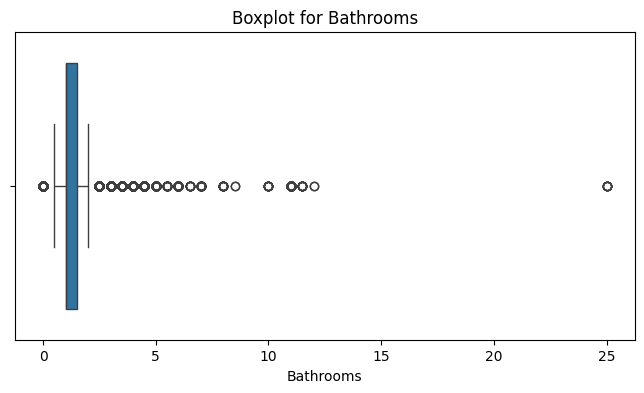


Analyzing Outliers in Column: Max Guests
Number of Outliers (IQR): 6085
Number of Outliers (Z-Score): 1982


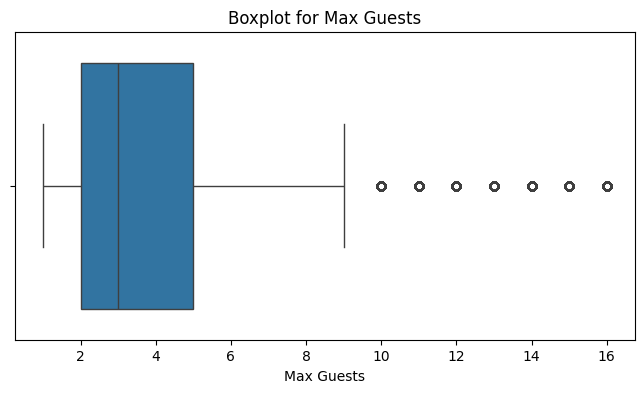


Analyzing Outliers in Column: Cleaning Fee (USD)
Number of Outliers (IQR): 8182
Number of Outliers (Z-Score): 2339


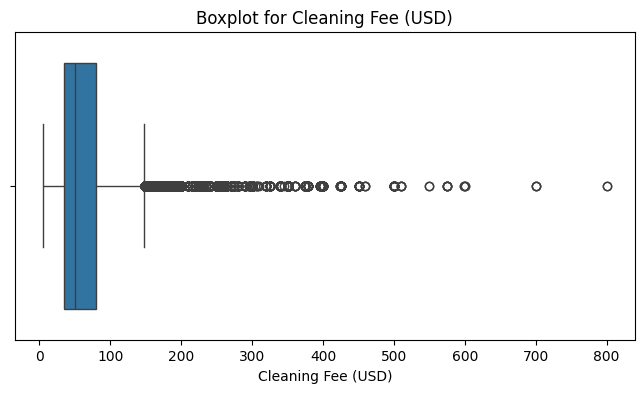


Analyzing Outliers in Column: Minimum Stay
Number of Outliers (IQR): 13973
Number of Outliers (Z-Score): 1002


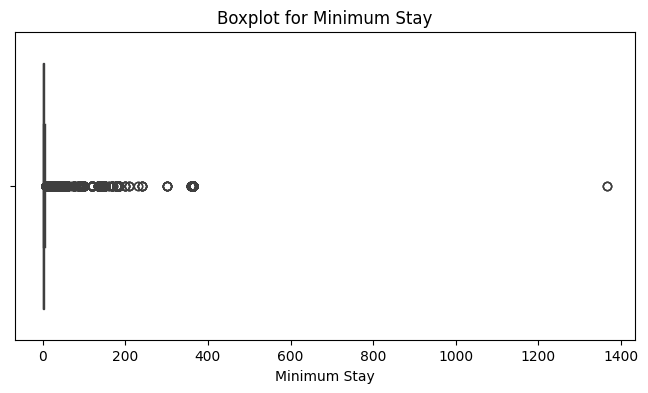


Analyzing Outliers in Column: Nightly Rate
Number of Outliers (IQR): 7568
Number of Outliers (Z-Score): 2123


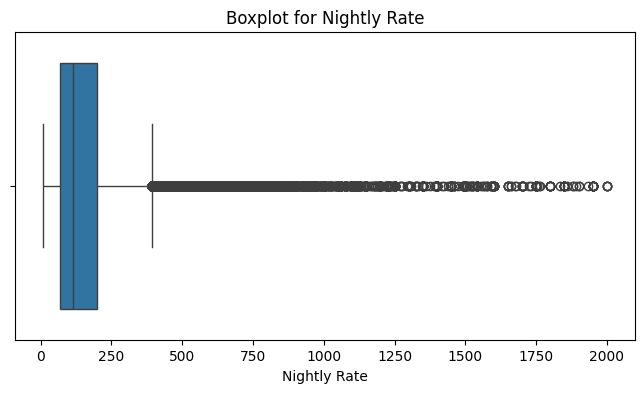


Analyzing Outliers in Column: Number of Reviews
Number of Outliers (IQR): 10080
Number of Outliers (Z-Score): 2661


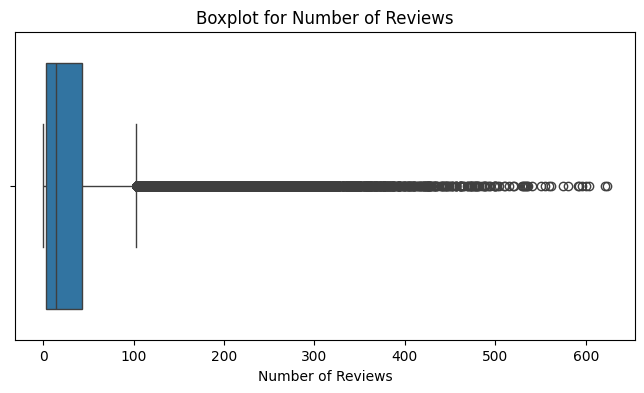


Analyzing Outliers in Column: Rating Overall
Number of Outliers (IQR): 7003
Number of Outliers (Z-Score): 1900


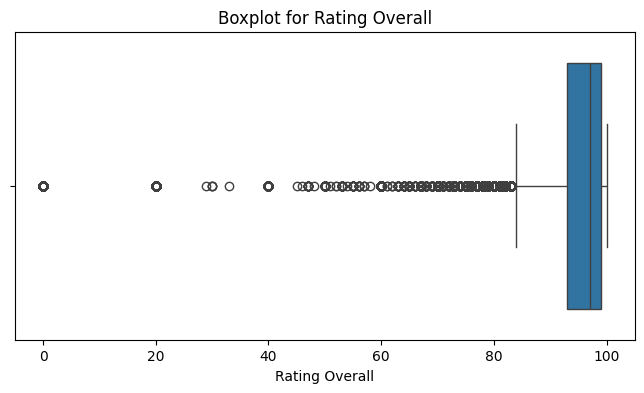


Analyzing Outliers in Column: revenue
Number of Outliers (IQR): 14210
Number of Outliers (Z-Score): 1913


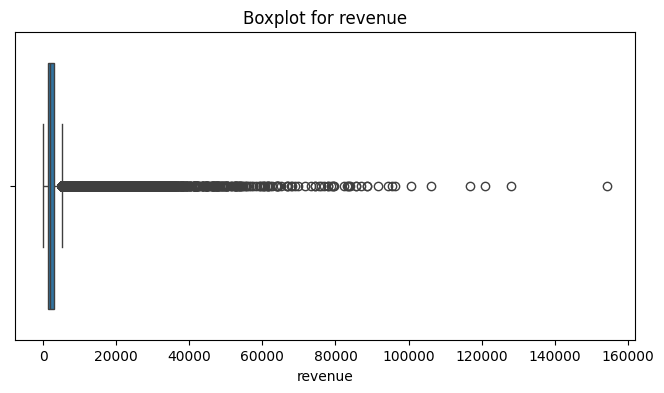


Analyzing Outliers in Column: occupancy_rate
Number of Outliers (IQR): 11450
Number of Outliers (Z-Score): 3132


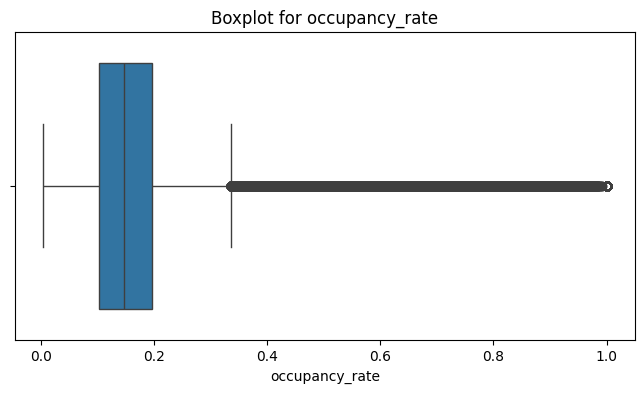


Analyzing Outliers in Column: census_tract
Number of Outliers (IQR): 0
Number of Outliers (Z-Score): 0


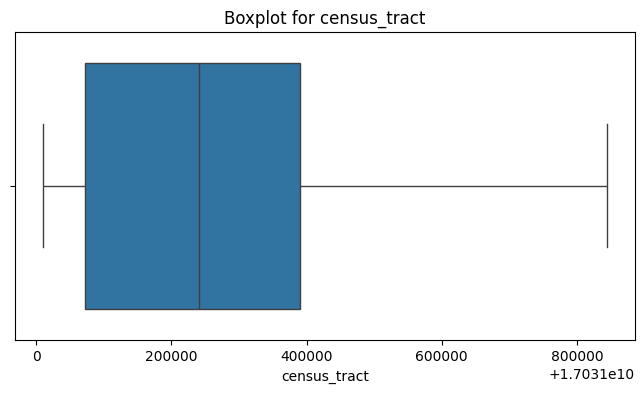


Analyzing Outliers in Column: tract_total_pop
Number of Outliers (IQR): 5037
Number of Outliers (Z-Score): 1884


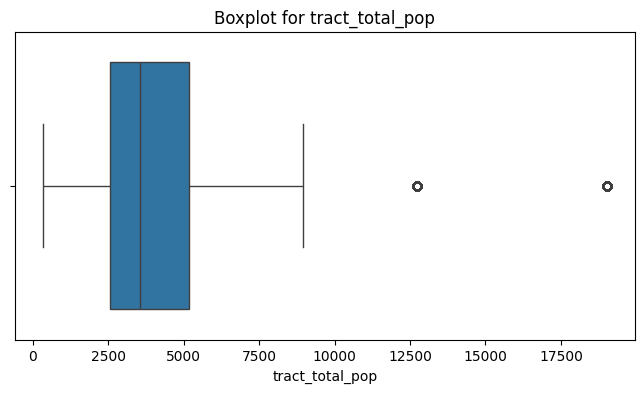


Analyzing Outliers in Column: tract_superhosts
Number of Outliers (IQR): 7650
Number of Outliers (Z-Score): 2726


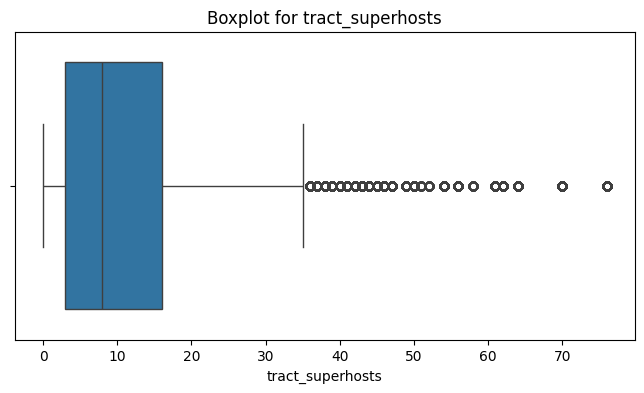


Analyzing Outliers in Column: tract_superhosts_ratio
Number of Outliers (IQR): 1386
Number of Outliers (Z-Score): 1027


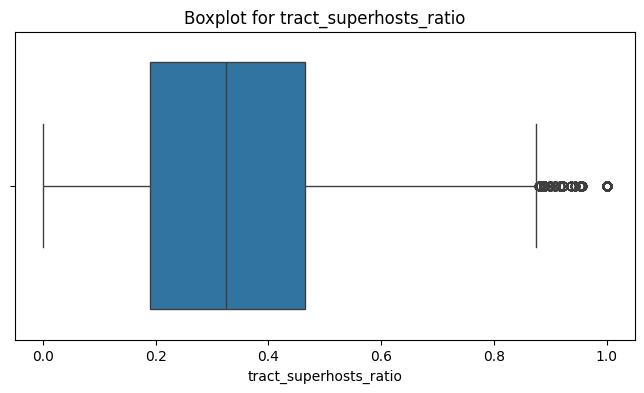


Analyzing Outliers in Column: tract_booking_share
Number of Outliers (IQR): 6954
Number of Outliers (Z-Score): 2402


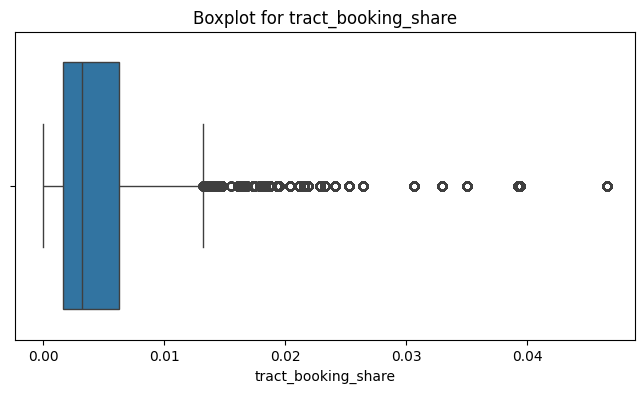


Analyzing Outliers in Column: tract_revenue_share
Number of Outliers (IQR): 10331
Number of Outliers (Z-Score): 2496


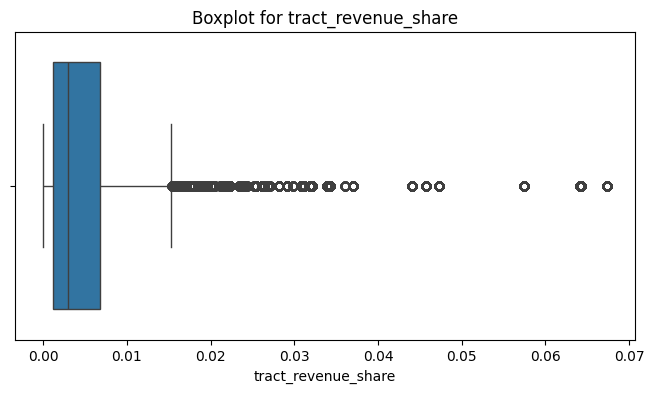


Handling Outliers in Column: Airbnb Host ID
Applied Winsorization for Airbnb Host ID. Values capped at [-103064541.5, 200887702.5]

Handling Outliers in Column: Airbnb Property ID
Applied Winsorization for Airbnb Property ID. Values capped at [-11822981.0, 46689571.0]

Handling Outliers in Column: superhost_period_all
Applied Winsorization for superhost_period_all. Values capped at [-3.0, 29.0]

Handling Outliers in Column: host_is_superhost_in_period
Applied Winsorization for host_is_superhost_in_period. Values capped at [-1.5, 2.5]

Handling Outliers in Column: prev_host_is_superhost_in_period
Applied Winsorization for prev_host_is_superhost_in_period. Values capped at [-1.5, 2.5]

Handling Outliers in Column: rating_ave_pastYear
Applied Winsorization for rating_ave_pastYear. Values capped at [4.352390851499999, 5.2588357595]

Handling Outliers in Column: numReviews_pastYear
Applied Winsorization for numReviews_pastYear. Values capped at [-62.5, 133.5]

Handling Outliers in Column: 

In [ ]:
numerical_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns

# Step 4: Outlier Detection using IQR and Z-Score
for col in numerical_columns:
    print(f"\nAnalyzing Outliers in Column: {col}")

    # Calculate IQR for the column
    Q1 = airbnb_data[col].quantile(0.25)
    Q3 = airbnb_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate Z-scores
    z_scores = zscore(airbnb_data[col].dropna())
    z_outliers = (np.abs(z_scores) > 3).sum()

    # Identify Outliers using IQR
    iqr_outliers = ((airbnb_data[col] < lower_bound) | (airbnb_data[col] > upper_bound)).sum()

    print(f"Number of Outliers (IQR): {iqr_outliers}")
    print(f"Number of Outliers (Z-Score): {z_outliers}")

    # Plot Boxplot for Visualization
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=airbnb_data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Step 5: Handle Outliers (Using Best Strategy)
for col in numerical_columns:
    print(f"\nHandling Outliers in Column: {col}")

    # Step 5a: Check if Outliers Are Errors
    # Assuming there is no prior domain knowledge to fix data errors

    # Step 5b: Assess Impact and Decide Strategy
    Q1 = airbnb_data[col].quantile(0.25)
    Q3 = airbnb_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option 1: Winsorization (Cap values at bounds)
    airbnb_data[col] = np.clip(airbnb_data[col], lower_bound, upper_bound)
    print(f"Applied Winsorization for {col}. Values capped at [{lower_bound}, {upper_bound}]")

    # Option 2: Removal of Extreme Outliers (Alternative Approach)
    # Uncomment this block if you want to drop rows instead of capping
    # airbnb_data = airbnb_data[(airbnb_data[col] >= lower_bound) & (airbnb_data[col] <= upper_bound)]
    # print(f"Dropped rows with extreme outliers in {col}")

Data Validation

In [ ]:

# Step 3: Exclude ID Columns from the Analysis
id_columns = ['Airbnb Host ID', 'Airbnb Property ID']
columns_to_analyze = [col for col in airbnb_data.columns if col not in id_columns]

# Step 4: Function for Comprehensive Analysis
def analyze_and_correct_data(df, columns):
    for col in columns:
        print(f"\nAnalyzing Column: {col}")

        # **1. Handle Numerical Columns**
        if df[col].dtype in ['float64', 'int64']:
            print(f"Column {col} identified as numerical.")

            # Check for invalid (e.g., negative) values
            invalid_values = df[df[col] < 0]
            if not invalid_values.empty:
                print(f"Invalid values found in {col}:")
                print(invalid_values)
                # Replace invalid values with NaN
                df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)


        # **2. Handle Categorical Columns**
        elif df[col].dtype == 'category':
            print(f"Column {col} identified as categorical.")

            # Check for format inconsistencies
            unique_values = df[col].unique()
            print(f"Unique values in {col}: {unique_values}")

            # Standardize formatting: lowercase, strip whitespaces
            df[col] = df[col].str.strip().str.lower()



        # **4. Catch-All for Other Data Types**
        else:
            print(f"Column {col} has an unrecognized or mixed data type. Review manually.")

    return df

# Step 5: Run the Analysis and Correction
airbnb_data = analyze_and_correct_data(airbnb_data, columns_to_analyze)


Analyzing Column: City_x
Column City_x identified as categorical.
Unique values in City_x: ['Chicago']
Categories (1, object): ['Chicago']

Analyzing Column: superhost_period_all
Column superhost_period_all identified as numerical.

Analyzing Column: Scraped Date
Column Scraped Date has an unrecognized or mixed data type. Review manually.

Analyzing Column: host_is_superhost_in_period
Column host_is_superhost_in_period identified as numerical.

Analyzing Column: prev_host_is_superhost_in_period
Column prev_host_is_superhost_in_period identified as numerical.

Analyzing Column: rating_ave_pastYear
Column rating_ave_pastYear identified as numerical.

Analyzing Column: numReviews_pastYear
Column numReviews_pastYear identified as numerical.

Analyzing Column: numCancel_pastYear
Column numCancel_pastYear identified as numerical.

Analyzing Column: num_5_star_Rev_pastYear
Column num_5_star_Rev_pastYear identified as numerical.

Analyzing Column: prop_5_StarReviews_pastYear
Column prop_5_Sta

In [ ]:
#give a list of unqiue values for each category column
categorical_columns = airbnb_data.select_dtypes(include=['object']).columns
print(categorical_columns)
for col in categorical_columns:
    unique_values = airbnb_data[col].unique()
    #print the values but arrange in ascending order
    unique_values.sort()
    print(f"Unique values in {col}: {unique_values}")

# Standardize and group similar categories in Property Type
property_type_mapping = {
    'entire apartment': 'apartment',
    'entire house': 'house',
    'bed &amp; breakfast': 'bed & breakfast',
    'bed and breakfast': 'bed & breakfast',
    'entire boat': 'boat'

    # Add other mappings as necessary
}
airbnb_data['Property Type'] = airbnb_data['Property Type'].str.strip().str.lower().replace(property_type_mapping)


Index(['City_x', 'Property Type', 'Listing Type', 'Neighborhood'], dtype='object')
Unique values in City_x: ['chicago']
Unique values in Property Type: ['apartment' 'barn' 'bed & breakfast' 'bed &amp; breakfast'
 'bed and breakfast' 'boat' 'boutique hotel' 'bungalow' 'cabin'
 'camper/rv' 'campsite' 'castle' 'cave' 'condominium' 'cottage'
 'dome house' 'dorm' 'earth house' 'entire apartment' 'entire boat'
 'entire condominium' 'entire floor' 'entire guest suite' 'entire house'
 'entire loft' 'entire place' 'entire timeshare' 'entire townhouse'
 'farm stay' 'floor' 'guest suite' 'guesthouse' 'home/apt' 'hostel'
 'hotel' 'hotel room in boutique hotel' 'hotel room in hostel' 'house'
 'hut' 'loft' 'other' 'place' 'private room' 'private room in apartment'
 'private room in condominium' 'private room in dorm'
 'private room in guest suite' 'private room in house'
 'private room in in-law' 'private room in loft'
 'private room in townhouse' 'resort' 'room in aparthotel'
 'room in bed and brea

Irrelevant Data

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
#import one hot encoder
from sklearn.preprocessing import OneHotEncoder
X=airbnb_data

# Assume the target variable is 'host_is_superhost_in_period'
target_variable = 'host_is_superhost_in_period'
X = airbnb_data.drop(columns=[target_variable])  # Features
y = airbnb_data[target_variable]  # Target

# Step 3: Business Logic to Drop Irrelevant Columns
# Identify columns like IDs, dates, or others known to be irrelevant
columns_to_drop = ['Airbnb Host ID', 'Airbnb Property ID', 'Scraped Date']  # Example irrelevant columns
X = X.drop(columns=columns_to_drop)
print(f"\nDropped columns based on business logic: {columns_to_drop}")

# Step 1: Select Only Numerical Columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numerical = X[numerical_columns]  # Subset of numerical columns

# Step 2: Apply VarianceThreshold to Numerical Features
low_variance_filter = VarianceThreshold(threshold=0.01)  # Keep features with variance > 0.01
X_low_variance = low_variance_filter.fit_transform(X_numerical)

# Step 3: Get Columns with Low Variance
low_variance_columns = X_numerical.columns[~low_variance_filter.get_support()]
print(f"\nDropped low-variance columns: {list(low_variance_columns)}")


# Step 5: Assess Feature Importance Using a Model
# Train Gradient Boosting Classifier to get feature importance
model = GradientBoostingClassifier(random_state=42)
model.fit(X_low_variance, y)  # Ensure the low-variance filtered data is used

# Get feature importance scores
importance_scores = pd.Series(model.feature_importances_, index=X_numerical.columns[low_variance_filter.get_support()])
irrelevant_features = importance_scores[importance_scores < 0.005].index  # Threshold for irrelevance
print(f"\nDropped features with low importance: {list(irrelevant_features)}")

# Drop irrelevant features from X_numerical
X_numerical = X_numerical.drop(columns=irrelevant_features)

# Update the original dataset X
X = X.drop(columns=irrelevant_features)

# Step 6: Assess Categorical Feature Relevance Using Mutual Information
# Mutual information measures the dependency between categorical features and the target

# Step 5: Handle Categorical Features
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns to encode: {list(categorical_columns)}")

# Apply Target Encoding for High-Cardinality Categorical Features
if 'Neighborhood' in categorical_columns:
    neighborhood_mean_target = airbnb_data.groupby('Neighborhood')[target_variable].mean()
    X['Neighborhood_Encoded'] = X['Neighborhood'].map(neighborhood_mean_target)

    # Remove 'Neighborhood' from categorical_columns for OneHotEncoder
    categorical_columns = categorical_columns.drop('Neighborhood')

# Apply One-Hot Encoding for Remaining Low-Cardinality Categorical Features
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first') # handle_unknown='ignore' to avoid errors during prediction
    encoded_categorical = pd.DataFrame(
        encoder.fit_transform(X[categorical_columns]),
        columns=encoder.get_feature_names_out(categorical_columns),
        index=X.index
    )

    # Drop Original Categorical Columns and Add Encoded Columns
    X_copy=X.copy()

    X = X.drop(columns=categorical_columns).join(encoded_categorical)

# Verify All Features Are Now Numeric
#print(X.dtypes)  # Should show all numerical data types
# Ensure all columns are numeric before calculating mutual information
X = X.select_dtypes(include=np.number)

# Step 6: Assess Mutual Information for Encoded Categorical Features
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=X.columns)

# Identify and Drop Irrelevant Encoded Features
irrelevant_categorical = mi_scores[mi_scores < 0.005].index  # Adjusted threshold
X = X.drop(columns=irrelevant_categorical)
print(f"\nDropped categorical features with low mutual information: {list(irrelevant_categorical)}")

X.info()





Dropped columns based on business logic: ['Airbnb Host ID', 'Airbnb Property ID', 'Scraped Date']

Dropped low-variance columns: ['numCancel_pastYear', 'occupancy_rate', 'tract_booking_share', 'tract_revenue_share']

Dropped features with low importance: ['superhost_period_all', 'available_days', 'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Nightly Rate', 'Number of Reviews', 'Rating Overall', 'revenue', 'census_tract', 'tract_total_pop', 'tract_superhosts']

Categorical columns to encode: ['City_x', 'Property Type', 'Listing Type', 'Neighborhood']

Dropped categorical features with low mutual information: ['numCancel_pastYear', 'Property Type_barn', 'Property Type_bed & breakfast', 'Property Type_boat', 'Property Type_boutique hotel', 'Property Type_bungalow', 'Property Type_cabin', 'Property Type_camper/rv', 'Property Type_campsite', 'Property Type_castle', 'Property Type_cave', 

In [ ]:
   X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119071 entries, 0 to 120216
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   City_x                            119071 non-null  object 
 1   prev_host_is_superhost_in_period  119071 non-null  int64  
 2   rating_ave_pastYear               119071 non-null  float64
 3   numReviews_pastYear               119071 non-null  float64
 4   numCancel_pastYear                119071 non-null  float64
 5   num_5_star_Rev_pastYear           119071 non-null  float64
 6   prop_5_StarReviews_pastYear       119071 non-null  float64
 7   numReservedDays_pastYear          119071 non-null  float64
 8   numReserv_pastYear                119071 non-null  float64
 9   Property Type                     119071 non-null  object 
 10  Listing Type                      119071 non-null  object 
 11  Neighborhood                      119071 non-null  object

Imbalanced Data

In [ ]:
data = X.join(y)
# Step 1: Import Necessary Libraries
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 3: Inspect Class Distribution
target_variable = 'host_is_superhost_in_period'
print(f"Class Distribution Before Balancing:\n{Counter(data[target_variable])}")

# Step 4: Split Dataset into Features and Target
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Step 5: Train-Test Split (Before Balancing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 7: Verify Class Distribution After Balancing
print(f"Class Distribution After Balancing:\n{Counter(y_train_balanced)}")

# Step 8: Train a Model on the Balanced Dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Step 9: Evaluate the Model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc:.4f}")


Class Distribution Before Balancing:
Counter({0: 79230, 1: 39841})
Class Distribution After Balancing:
Counter({1: 63383, 0: 63383})

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15847
           1       0.92      0.95      0.93      7968

    accuracy                           0.96     23815
   macro avg       0.95      0.95      0.95     23815
weighted avg       0.96      0.96      0.96     23815

AUC-ROC Score: 0.9905


In [ ]:
import pandas as pd
import numpy as np

df=data

# Step 1: Transformations
# Log-transform numerical features to reduce skewness
df['log_numReviews_pastYear'] = np.log1p(df['numReviews_pastYear'])  # log(1 + x)
df['log_numReserv_pastYear'] = np.log1p(df['numReserv_pastYear'])
df['log_num_5_star_Rev_pastYear'] = np.log1p(df['num_5_star_Rev_pastYear'])

# Binning occupancy_rate into categories
df['occupancy_rate_bin'] = pd.cut(
    df['occupancy_rate'],
    bins=[-1, 0.5, 0.75, 1],
    labels=['Low (<50%)', 'Medium (50%-75%)', 'High (>75%)']
)

# Step 2: Ratios
# 5-Star Review Ratio
df['five_star_review_ratio'] = df['num_5_star_Rev_pastYear'] / df['numReviews_pastYear']

# Booking-to-Revenue Ratio
df['booking_to_revenue_ratio'] = df['tract_booking_share'] / (df['tract_revenue_share'] + 1e-9)  # Avoid division by zero

# Superhost Density Ratio
df['superhost_density_ratio'] = df['tract_superhosts_ratio']

# Step 3: Interaction Features
# Interaction between Neighborhood Encoded and occupancy_rate
df['neighborhood_occupancy_interaction'] = df['Neighborhood_Encoded'] * df['occupancy_rate']

# Interaction between Property Type and Booking Share
#df['property_booking_interaction'] = df['Property Type_hostel'] * df['tract_booking_share']

# Step 4: Encoded Variables
# Neighborhood_Encoded and Property Type_hostel are already encoded as numeric
# They are being used directly in interaction features and for transformations above.

# Step 5: Inspect the Newly Engineered Features
new_features = [
    'log_numReviews_pastYear', 'log_numReserv_pastYear', 'log_num_5_star_Rev_pastYear',
    'occupancy_rate_bin', 'five_star_review_ratio', 'booking_to_revenue_ratio',
    'superhost_density_ratio', 'neighborhood_occupancy_interaction', 'property_booking_interaction'
]
print("\nNewly engineered features added to the dataset:")
print(new_features)




Newly engineered features added to the dataset:
['log_numReviews_pastYear', 'log_numReserv_pastYear', 'log_num_5_star_Rev_pastYear', 'occupancy_rate_bin', 'five_star_review_ratio', 'booking_to_revenue_ratio', 'superhost_density_ratio', 'neighborhood_occupancy_interaction', 'property_booking_interaction']


In [ ]:


# Step 1: Review Distributions of New Features
new_features = [
    'log_numReviews_pastYear', 'log_numReserv_pastYear', 'log_num_5_star_Rev_pastYear',
    'occupancy_rate_bin', 'five_star_review_ratio', 'booking_to_revenue_ratio',
    'superhost_density_ratio', 'neighborhood_occupancy_interaction'
]

# Descriptive statistics for numeric features
print("\nDescriptive Statistics for New Numeric Features:")
print(df[new_features].describe())

# Value counts for categorical features (if any)
if 'occupancy_rate_bin' in df.columns:
    print("\nValue Counts for 'occupancy_rate_bin':")
    print(df['occupancy_rate_bin'].value_counts())

# Step 2: Check for NaN and Infinite Values
# Check for NaN values
nan_counts = df[new_features].isna().sum()
print("\nNumber of NaN values in new features:")
print(nan_counts)

# Check for infinite values using np.isfinite
# Exclude the categorical feature 'occupancy_rate_bin'
numeric_new_features = [f for f in new_features if f != 'occupancy_rate_bin']
inf_counts = df[numeric_new_features].applymap(lambda x: not np.isfinite(x)).sum()
print("\nNumber of infinite values in new features:")
print(inf_counts)

# Step 3: Drop or Replace NaN/Infinite Values
# Replace NaN or infinite values with a placeholder (e.g., 0 or mean)
for feature in numeric_new_features: # Iterate over numeric features only
    if nan_counts[feature] > 0 or inf_counts[feature] > 0:
        print(f"\nFixing issues in feature: {feature}")
        # Replace NaN with the mean and infinite values with a large placeholder (or drop rows as needed)
        df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
        df[feature] = df[feature].fillna(df[feature].mean())




Descriptive Statistics for New Numeric Features:
       log_numReviews_pastYear  log_numReserv_pastYear  \
count            119071.000000           119071.000000   
mean                  3.239590                3.744772   
std                   1.188818                1.633879   
min                   0.000000                0.000000   
25%                   2.484907                2.772589   
50%                   3.367296                3.931826   
75%                   4.110874                5.036953   
max                   4.901564                5.888878   

       log_num_5_star_Rev_pastYear  occupancy_rate_bin  \
count                119071.000000            119071.0   
mean                      3.049382                 0.0   
std                       1.177536                 0.0   
min                       0.000000                 0.0   
25%                       2.302585                 0.0   
50%                       3.178054                 0.0   
75%                  

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score



# Encode the 'occupancy_rate_bin' column if it exists
if 'occupancy_rate_bin' in df.columns:
    le = LabelEncoder()
    df['occupancy_rate_bin'] = le.fit_transform(df['occupancy_rate_bin'])

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score



# Split features and target
X = df.drop(columns=['host_is_superhost_in_period'])
y = df['host_is_superhost_in_period']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a smaller hyperparameter space for faster tuning
param_distributions = {
    'n_estimators': [50, 100, 150],         # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 4, 5],                # Maximum depth of trees
    'min_samples_split': [5, 10],          # Minimum samples required to split
    'min_samples_leaf': [2, 4],            # Minimum samples per leaf node
}

# Initialize Gradient Boosting Classifier
gbdt = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gbdt,
    param_distributions=param_distributions,
    n_iter=30,                   # Try 30 random combinations
    scoring='roc_auc',           # Optimize for AUC-ROC
    cv=3,                        # 3-fold cross-validation
    verbose=1,                   # Print progress
    n_jobs=-1,                   # Use all CPU cores
    random_state=42              # Ensure reproducibility
)

# Perform Randomized Search
print("Starting hyperparameter tuning with RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Best Parameters and Model Evaluation
print("\nBest Parameters Found:")
print(random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")


Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters Found:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15847
           1       0.91      0.91      0.91      7968

    accuracy                           0.94     23815
   macro avg       0.93      0.94      0.93     23815
weighted avg       0.94      0.94      0.94     23815


AUC-ROC Score: 0.9857


In [ ]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119071 entries, 0 to 120216
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   prev_host_is_superhost_in_period  119071 non-null  int64  
 1   rating_ave_pastYear               119071 non-null  float64
 2   numReviews_pastYear               119071 non-null  float64
 3   num_5_star_Rev_pastYear           119071 non-null  float64
 4   prop_5_StarReviews_pastYear       119071 non-null  float64
 5   numReservedDays_pastYear          119071 non-null  float64
 6   numReserv_pastYear                119071 non-null  float64
 7   occupancy_rate                    119071 non-null  float64
 8   tract_superhosts_ratio            119071 non-null  float64
 9   tract_booking_share               119071 non-null  float64
 10  tract_revenue_share               119071 non-null  float64
 11  Neighborhood_Encoded              119071 non-null  float6

(None, None)

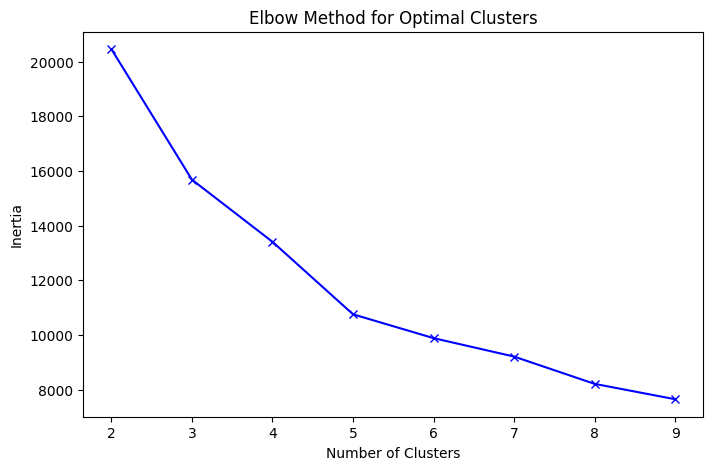


Cluster Distribution:
Cluster
0    54252
2    24938
1    21592
3    18289
Name: count, dtype: int64
         tract_booking_share  tract_revenue_share  occupancy_rate  \
Cluster                                                             
0                   0.001838             0.001592        0.116302   
1                   0.003364             0.003084        0.296785   
2                   0.005916             0.006426        0.123253   
3                   0.011250             0.013930        0.162940   

         superhost_density_ratio  
Cluster                           
0                       0.332203  
1                       0.362138  
2                       0.342292  
3                       0.291756  


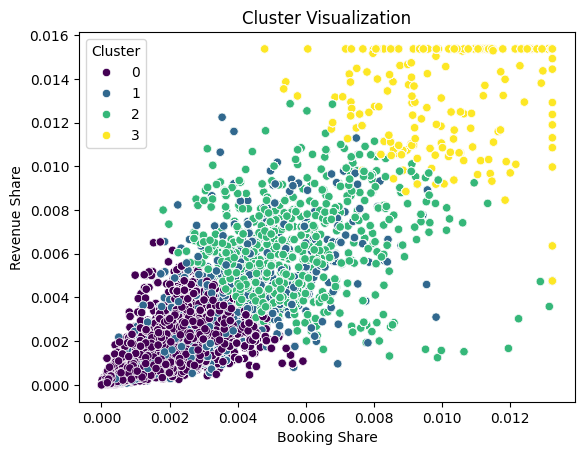

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd


# Select features for clustering
clustering_features = ['tract_booking_share', 'tract_revenue_share', 'occupancy_rate', 'superhost_density_ratio']
X_clustering = df[clustering_features]

# Normalize features
scaler = MinMaxScaler()
X_clustering_normalized = scaler.fit_transform(X_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(2, 10)  # Test 2 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering_normalized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Choose optimal number of clusters (e.g., based on the elbow point)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_clustering_normalized)

# Analyze cluster distribution
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

clustering_features = ['tract_booking_share', 'tract_revenue_share', 'occupancy_rate', 'superhost_density_ratio']
cluster_summary = df.groupby('Cluster')[clustering_features].mean()
print(cluster_summary)

import seaborn as sns

# Example scatter plot
sns.scatterplot(
    x=df['tract_booking_share'],
    y=df['tract_revenue_share'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.xlabel('Booking Share')
plt.ylabel('Revenue Share')
plt.title('Cluster Visualization')
plt.show()


In [ ]:
# Step 1: Add GBDT Probabilities
df['gbdt_probability'] = best_model.predict_proba(X)[:, 1]  # GBDT-predicted probabilities

# Step 2: Normalize Features
scaler = MinMaxScaler()
df['norm_booking_share'] = scaler.fit_transform(df[['tract_booking_share']])
df['norm_revenue_share'] = scaler.fit_transform(df[['tract_revenue_share']])
df['norm_occupancy_rate'] = scaler.fit_transform(df[['occupancy_rate']])
df['norm_superhost_density_ratio'] = scaler.fit_transform(df[['superhost_density_ratio']])
df['norm_gbdt_probability'] = scaler.fit_transform(df[['gbdt_probability']])

# Step 3: Add Cluster GPI Scores
cluster_gpi_mapping = {0: 0.6, 1: 0.4, 2: 0.2, 3: 0.8}  # Define weights for clusters
df['cluster_gpi'] = df['Cluster'].map(cluster_gpi_mapping)

# Step 4: Calculate Final GPI
weights = {
    'booking_share': 0.25,
    'revenue_share': 0.25,
    'occupancy_rate': 0.2,
    'superhost_density_ratio': 0.1,
    'gbdt_probability': 0.1,
    'cluster_gpi': 0.1,
}
df['GPI'] = (
    weights['booking_share'] * df['norm_booking_share'] +
    weights['revenue_share'] * df['norm_revenue_share'] +
    weights['occupancy_rate'] * df['norm_occupancy_rate'] +
    weights['superhost_density_ratio'] * df['norm_superhost_density_ratio'] +
    weights['gbdt_probability'] * df['norm_gbdt_probability'] +
    weights['cluster_gpi'] * df['cluster_gpi']
)

# Step 5: Normalize Final GPI
df['GPI'] = scaler.fit_transform(df[['GPI']])

# Step 6: Display Top Neighborhoods/Properties by GPI
top_gpi = df[['Neighborhood_Encoded', 'GPI', 'Cluster', 'gbdt_probability']].sort_values(by='GPI', ascending=False)
print("\nTop Neighborhoods/Properties by GPI:")
print(top_gpi.head(100))





Top Neighborhoods/Properties by GPI:
        Neighborhood_Encoded       GPI  Cluster  gbdt_probability
54492               0.253757  1.000000        3          0.993775
66196               0.253757  1.000000        3          0.993775
115168              0.253757  0.999405        3          0.973871
115207              0.253757  0.999405        3          0.973871
103696              0.253779  0.987007        3          0.993017
105424              0.253779  0.987007        3          0.993017
103701              0.253779  0.987007        3          0.993017
105217              0.253779  0.987007        3          0.993017
105207              0.253779  0.987007        3          0.993017
103706              0.253779  0.987007        3          0.993017


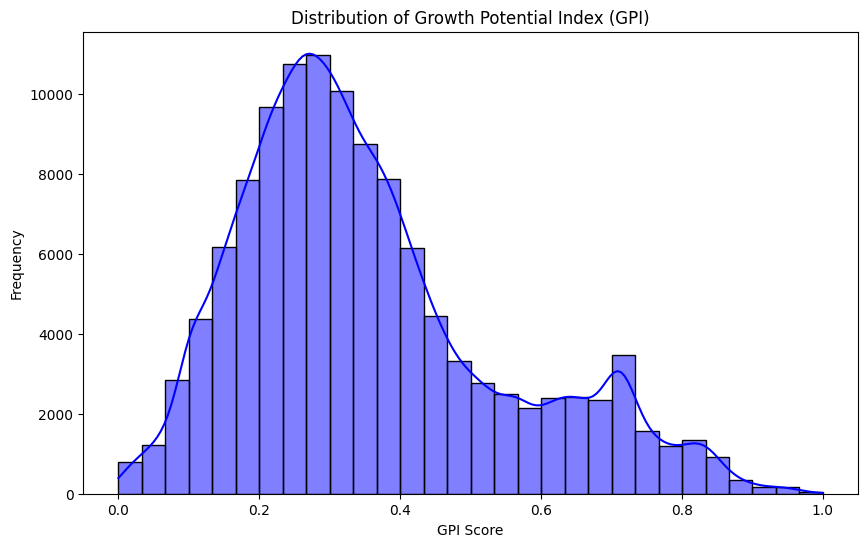

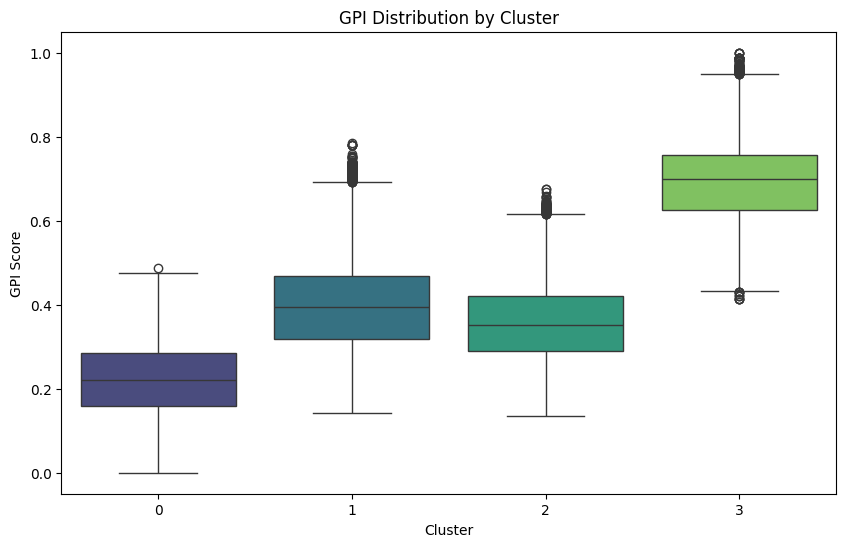

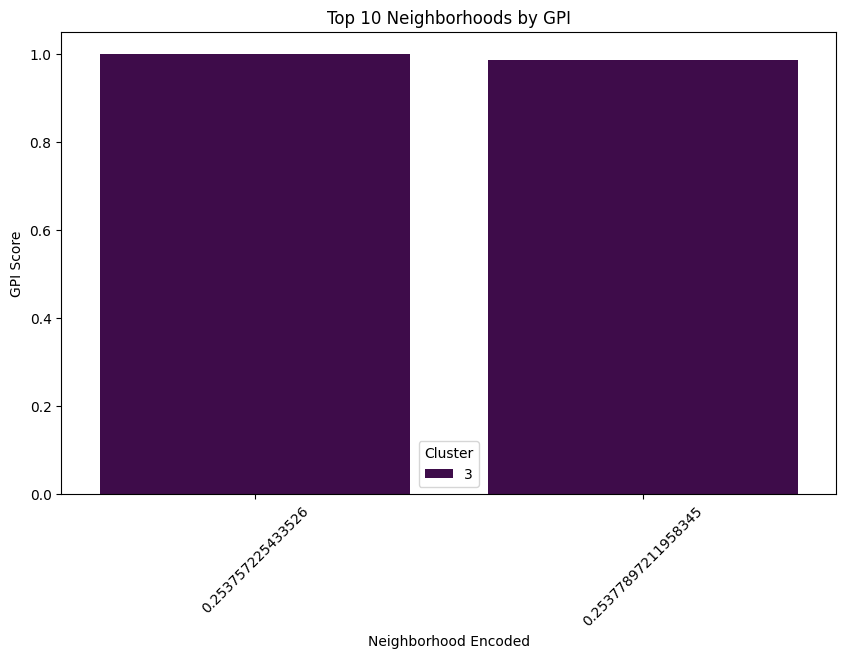

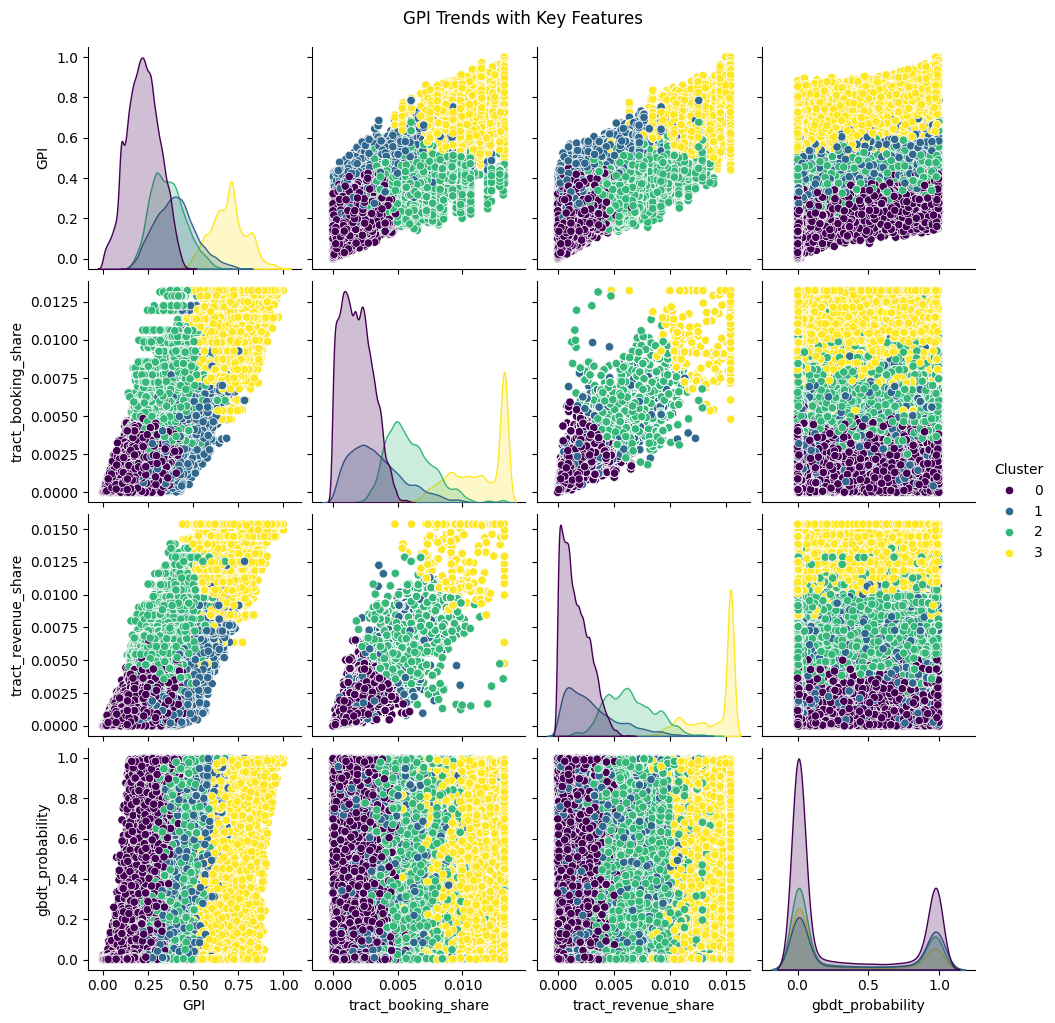

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Distribution of GPI
plt.figure(figsize=(10, 6))
sns.histplot(df['GPI'], bins=30, kde=True, color='blue')
plt.title('Distribution of Growth Potential Index (GPI)')
plt.xlabel('GPI Score')
plt.ylabel('Frequency')
plt.show()

# Step 2: Boxplot of GPI by Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='GPI', data=df, palette='viridis')
plt.title('GPI Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('GPI Score')
plt.show()

# Step 3: Top Clusters/Neighborhoods by GPI
top_gpi = df[['Neighborhood_Encoded', 'GPI', 'Cluster']].sort_values(by='GPI', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_gpi, x='Neighborhood_Encoded', y='GPI', hue='Cluster', dodge=False, palette='viridis')
plt.title('Top 10 Neighborhoods by GPI')
plt.xlabel('Neighborhood Encoded')
plt.ylabel('GPI Score')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# Step 4: Pairplot for GPI vs. Features
sns.pairplot(df, vars=['GPI', 'tract_booking_share', 'tract_revenue_share', 'gbdt_probability'], hue='Cluster', palette='viridis')
plt.suptitle('GPI Trends with Key Features', y=1.02)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Extract Neighborhood mapping
mapping_df = X_copy[['Neighborhood', 'Neighborhood_Encoded']].drop_duplicates()
mapping_dict = dict(zip(mapping_df['Neighborhood_Encoded'], mapping_df['Neighborhood']))
df['Neighborhood'] = df['Neighborhood_Encoded'].map(mapping_dict)

# Gather user input
print("Welcome to the Airbnb Growth Potential Recommendation System!")
input_data = {
    'Neighborhood_Encoded': [df.loc[df['Neighborhood'] == input("Enter neighborhood: "), 'Neighborhood_Encoded'].iloc[0]],
    'rating_ave_pastYear': [float(input("Enter guest rating (e.g., 4.5): "))],
    'numReviews_pastYear': [int(input("Enter total reviews in the past year: "))],
    'num_5_star_Rev_pastYear': [int(input("Enter number of 5-star reviews: "))],
    'numReserv_pastYear': [int(input("Enter total trips hosted: "))],
    'cancellations': [int(input("Enter cancellations in the past year: "))],
    'occupancy_rate': [float(input("Enter occupancy rate (e.g., 70): ")) / 100],
}

input_df = pd.DataFrame(input_data)

# Feature Engineering
input_df['log_numReviews_pastYear'] = np.log1p(input_df['numReviews_pastYear'])
input_df['five_star_review_ratio'] = input_df['num_5_star_Rev_pastYear'] / input_df['numReviews_pastYear']
input_df['five_star_review_ratio'].fillna(0, inplace=True)
input_df['neighborhood_occupancy_interaction'] = input_df['Neighborhood_Encoded'] * input_df['occupancy_rate']

# Handle Missing Columns
for col in X_columns:
    if col not in input_df.columns:
        input_df[col] = df[col].mean() if col in df.columns else 0

input_df = input_df.reindex(columns=X_columns, fill_value=0)

# Normalize input
scaler = MinMaxScaler().fit(df[X_columns])
normalized_input = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)

# Predict Superhost Probability
superhost_probability = best_model.predict_proba(normalized_input)[:, 1][0]

# Add superhost probability
normalized_input['superhost_probability'] = superhost_probability

# Calculate GPI
cluster_gpi = df[df['Cluster'] == input_cluster]['GPI'].mean()
weights = {'rating_ave_pastYear': 0.25, 'occupancy_rate': 0.2, 'superhost_probability': 0.2, 'cluster_gpi': 0.15}
gpi = (
    weights['rating_ave_pastYear'] * normalized_input['rating_ave_pastYear'][0] +
    weights['occupancy_rate'] * normalized_input['occupancy_rate'][0] +
    weights['superhost_probability'] * superhost_probability +
    weights['cluster_gpi'] * cluster_gpi
)

# Print Results
print(f"Your property's Superhost probability is {superhost_probability:.2f}.")
print(f"Your property's GPI is {gpi:.2f}. This places it in a {'high' if gpi > 0.7 else 'moderate' if gpi > 0.5 else 'low'} growth category.")

# 1. Superhost Probability
if superhost_probability > 0.8:
    print("You have a high probability of achieving Superhost status. Keep up the great work!")
else:
    print("Your Superhost probability is below 80%.")
    if trips_hosted_input < 10:
        print("Host more trips to meet the 10-trip Superhost minimum.")
    if five_star_reviews_input / reviews_total_input < 0.8:
        print("Improve guest satisfaction to increase your 5-star review ratio above 80%.")
    if cancellations_input > 0:
        print("Avoid further cancellations to maintain Superhost eligibility.")

# 2. Cluster Analysis
print(f"Your property belongs to Cluster {input_cluster}, which is a {'high-growth' if cluster_gpi > 0.7 else 'steady-growth' if cluster_gpi > 0.5 else 'low-growth'} cluster.")
if cluster_gpi > 0.7:
    print("Consider raising prices during high-demand periods.")
elif cluster_gpi < 0.5:
    print("Focus on improving amenities or marketing to attract more guests.")

# 3. Revenue Growth Target
if revenue_growth_input > 0:
    print(f"To achieve your revenue growth target of {revenue_growth_input}%, consider increasing your nightly rate by 10-15% during peak seasons.")

# 4. Occupancy Rate Insights
if occupancy_rate_input < 70:
    print("Your occupancy rate is below the optimal level. Use promotions to increase bookings during low-demand periods.")



# 6. Booking to Revenue Insights
print(f"Your neighborhood's booking-to-revenue ratio is {booking_to_revenue_ratio:.2f}. Align your pricing with demand trends to improve revenue.")

# 7. Superhost Density
print(f"The Superhost density in your neighborhood is {superhost_density_ratio:.2f}%. Use this as a benchmark to assess competition.")

# 8. GPI Trends
print(f"Focus on improving your GPI score by addressing guest satisfaction and optimizing pricing.")

# 9. Neighborhood Trends
print(f"Properties in the {neighborhood_input} neighborhood have high potential. Leverage this advantage to stand out in the market.")





Welcome to the Airbnb Growth Potential Recommendation System!
Enter neighborhood: near north side
Enter guest rating (e.g., 4.5): 5
Enter total reviews in the past year: 90
Enter number of 5-star reviews: 88
Enter total trips hosted: 11
Enter cancellations in the past year: 0
Enter occupancy rate (e.g., 70): 90
Your property's Superhost probability is 0.00.
Your property's GPI is 0.90. This places it in a high growth category.
Your Superhost probability is below 80%.
Your property belongs to Cluster 3, which is a steady-growth cluster.
To achieve your revenue growth target of 22.0%, consider increasing your nightly rate by 10-15% during peak seasons.
Your neighborhood's booking-to-revenue ratio is 0.83. Align your pricing with demand trends to improve revenue.
The Superhost density in your neighborhood is 0.25%. Use this as a benchmark to assess competition.
Focus on improving your GPI score by addressing guest satisfaction and optimizing pricing.
Properties in the loop neighborhood ha

In [ ]:
 = {
    'Neighborhood_Encoded': [df.loc[df['Neighborhood'] == input("Enter neighborhood: "), 'Neighborhood_Encoded'].iloc[0]],
    'rating_ave_pastYear': [float(input("Enter guest rating (e.g., 4.5): "))],
    'numReviews_pastYear': [int(input("Enter total reviews in the past year: "))],
    'num_5_star_Rev_pastYear': [int(input("Enter number of 5-star reviews: "))],
    'numReserv_pastYear': [int(input("Enter total trips hosted: "))],
    'cancellations': [int(input("Enter cancellations in the past year: "))],
    'occupancy_rate': [float(input("Enter occupancy rate (e.g., 70): ")) / 100],
}

input_df = pd.DataFrame(input_data)

# Feature Engineering
input_df['log_numReviews_pastYear'] = np.log1p(input_df['numReviews_pastYear'])
input_df['five_star_review_ratio'] = input_df['num_5_star_Rev_pastYear'] / input_df['numReviews_pastYear']
input_df['five_star_review_ratio'].fillna(0, inplace=True)
input_df['neighborhood_occupancy_interaction'] = input_df['Neighborhood_Encoded'] * input_df['occupancy_rate']

# Handle Missing Columns
for col in X_columns:
    if col not in input_df.columns:
        input_df[col] = df[col].mean() if col in df.columns else 0

input_df = input_df.reindex(columns=X_columns, fill_value=0)

# Normalize input
scaler = MinMaxScaler().fit(df[X_columns])
normalized_input = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)

# Predict Superhost Probability
superhost_probability = best_model.predict_proba(normalized_input)[:, 1][0]

# Add superhost probability
normalized_input['superhost_probability'] = superhost_probability

# Calculate GPI
cluster_gpi = df[df['Cluster'] == input_cluster]['GPI'].mean()
weights = {'rating_ave_pastYear': 0.25, 'occupancy_rate': 0.2, 'superhost_probability': 0.2, 'cluster_gpi': 0.15}
gpi = (
    weights['rating_ave_pastYear'] * normalized_input['rating_ave_pastYear'][0] +
    weights['occupancy_rate'] * normalized_input['occupancy_rate'][0] +
    weights['superhost_probability'] * superhost_probability +
    weights['cluster_gpi'] * cluster_gpi
)

# Print Results
print(f"Your property's Superhost probability is {superhost_probability:.2f}.")
print(f"Your property's GPI is {gpi:.2f}. This places it in a {'high' if gpi > 0.7 else 'moderate' if gpi > 0.5 else 'low'} growth category.")

# 1. Superhost Probability
if superhost_probability > 0.8:
    print("You have a high probability of achieving Superhost status. Keep up the great work!")
else:
    print("Your Superhost probability is below 80%.")
    if trips_hosted_input < 10:
        print("Host more trips to meet the 10-trip Superhost minimum.")
    if five_star_reviews_input / reviews_total_input < 0.8:
        print("Improve guest satisfaction to increase your 5-star review ratio above 80%.")
    if cancellations_input > 0:
        print("Avoid further cancellations to maintain Superhost eligibility.")

# 2. Cluster Analysis
print(f"Your property belongs to Cluster {input_cluster}, which is a {'high-growth' if cluster_gpi > 0.7 else 'steady-growth' if cluster_gpi > 0.5 else 'low-growth'} cluster.")
if cluster_gpi > 0.7:
    print("Consider raising prices during high-demand periods.")
elif cluster_gpi < 0.5:
    print("Focus on improving amenities or marketing to attract more guests.")

# 3. Revenue Growth Target
if revenue_growth_input > 0:
    print(f"To achieve your revenue growth target of {revenue_growth_input}%, consider increasing your nightly rate by 10-15% during peak seasons.")

# 4. Occupancy Rate Insights
if occupancy_rate_input < 70:
    print("Your occupancy rate is below the optimal level. Use promotions to increase bookings during low-demand periods.")

# 6. Booking to Revenue Insights
print(f"Your neighborhood's booking-to-revenue ratio is {booking_to_revenue_ratio:.2f}. Align your pricing with demand trends to improve revenue.")

# 7. Superhost Density
print(f"The Superhost density in your neighborhood is {superhost_density_ratio:.2f}%. Use this as a benchmark to assess competition.")

# 8. GPI Trends
print(f"Focus on improving your GPI score by addressing guest satisfaction and optimizing pricing.")

# 9. Neighborhood Trends
print(f"Properties in the {neighborhood_input} neighborhood have high potential. Leverage this advantage to stand out in the market.")

Welcome to the Airbnb Growth Potential Recommendation System!
Enter neighborhood: near north side
Enter guest rating (e.g., 4.5): 5
Enter total reviews in the past year: 90
Enter number of 5-star reviews: 88
Enter total trips hosted: 11
Enter cancellations in the past year: 0
Enter occupancy rate (e.g., 70): 90

Your property's Superhost probability is 70%.
Your property's GPI is 0.90. This places it in a high growth category.
Your Superhost probability is below 80%.
Your property belongs to Cluster 3, which is a steady-growth cluster.
To achieve your revenue growth target of 22.0%, consider increasing your nightly rate by 10-15% during peak seasons.
Your neighborhood's booking-to-revenue ratio is 0.83. Align your pricing with demand trends to improve revenue.
The Superhost density in your neighborhood is 0.25%. Use this as a benchmark to assess competition.
Focus on improving your GPI score by addressing guest satisfaction and optimizing pricing.
Properties in the loop neighborhood ha